<a href="https://colab.research.google.com/github/mehrnazeraeisi/KnnRegressor_Result/blob/main/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#   مشاهده نمودارها برای هر درصد دلخواه
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def evaluate_knn_on_dataset(X_data, y_data, test_size=0.2, n_repeats=20):
    # مرحله 1: محاسبه R² و MSE برای تک‌ویژگی‌ها
    def compute_r2_mse_per_feature(X, y):
        scores = []
        for feature in X.columns:
            model = KNeighborsRegressor()
            model.fit(X[[feature]], y)
            y_pred = model.predict(X[[feature]])
            r2 = r2_score(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            scores.append((feature, r2, mse))
        df_scores = pd.DataFrame(scores, columns=['Feature', 'R2', 'MSE'])
        return df_scores.sort_values(by='R2', ascending=False).reset_index(drop=True)

    # مرحله 2: بررسی گروه‌های افزایشی ویژگی‌ها
    def evaluate_incremental_feature_groups(X, y, sorted_features):
        results = []
        best_r2 = -np.inf
        best_group = []
        for k in range(1, len(sorted_features) + 1):
            group = sorted_features[:k]
            model = KNeighborsRegressor()
            model.fit(X[group], y)
            y_pred = model.predict(X[group])
            r2 = r2_score(y, y_pred)
            mse = mean_squared_error(y, y_pred)
            results.append((k, r2, mse))
            if r2 > best_r2:
                best_r2 = r2
                best_group = group
        # اضافه کردن All Features به لیست
        model.fit(X, y)
        y_pred = model.predict(X)
        all_r2 = r2_score(y, y_pred)
        all_mse = mean_squared_error(y, y_pred)
        results.append(("All Features", all_r2, all_mse))
        return pd.DataFrame(results, columns=["Group Size", "R2 Score", "MSE"]), best_group

    # اجرای مراحل
    single_feat_df = compute_r2_mse_per_feature(X_data, y_data)
    sorted_features = single_feat_df['Feature'].tolist()
    group_results_df, best_group = evaluate_incremental_feature_groups(X_data, y_data, sorted_features)

    # مرحله 3: چاپ نتایج اولیه
    print("📌 نتایج R² و MSE برای هر ویژگی:")
    print(single_feat_df.to_string(index=False))

    print("\n📊 نتایج عملکرد گروه‌های افزایشی (R² و MSE):")
    print(group_results_df.to_string(index=False))

    best_r2 = group_results_df[group_results_df["Group Size"] == len(best_group)]["R2 Score"].values[0]
    best_mse = group_results_df[group_results_df["Group Size"] == len(best_group)]["MSE"].values[0]

    print("\n🏆 بهترین گروه:")
    print(f"📌 تعداد ویژگی‌ها: {len(best_group)}")
    print(f"🔹 R²: {best_r2:.4f}")
    print(f"🔻 MSE: {best_mse:.2f}")

    # مرحله 4: ارزیابی نهایی با Split و رسم نمودار
    r2_scores = {"all_features": [], "best_group": []}
    mse_scores = {"all_features": [], "best_group": []}

    feature_groups = {
        "all_features": X_data.columns.tolist(),
        "best_group": best_group
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)
        for group_name, group_features in feature_groups.items():
            model = KNeighborsRegressor()
            model.fit(X_train[group_features], y_train)
            y_pred = model.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred))

    # رسم نمودار R²
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(8, 4))
    for name, r2 in r2_scores.items():
        plt.plot(x, r2, label=f"{name.replace('_', ' ').title()} R²", marker='o')
    plt.xlabel("Repeat")
    plt.ylabel("R² Score")
    plt.title("KNN Regressor R² Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

    # رسم نمودار MSE
    plt.figure(figsize=(8, 4))
    for name, mse in mse_scores.items():
        plt.plot(x, mse, label=f"{name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel("Repeat")
    plt.ylabel("Mean Squared Error")
    plt.title("KNN Regressor MSE Performance")
    plt.legend()
    plt.grid(True)
    plt.show()

    # چاپ نتایج نهایی میانگین
    print("\n📈 میانگین نتایج پس از تکرار:")
    for name in feature_groups:
        avg_r2 = np.mean(r2_scores[name])
        avg_mse = np.mean(mse_scores[name])
        print(f"{name.replace('_', ' ').title()} → R²: {avg_r2:.4f}, MSE: {avg_mse:.2f}")


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(506, 13)
📌 نتایج R² و MSE برای هر ویژگی:
Feature        R2        MSE
  lstat  0.734911  22.378655
     rm  0.686989  26.424267
    nox  0.633597  30.931555
   crim  0.437419  47.492813
    dis  0.346941  55.130964
    age  0.

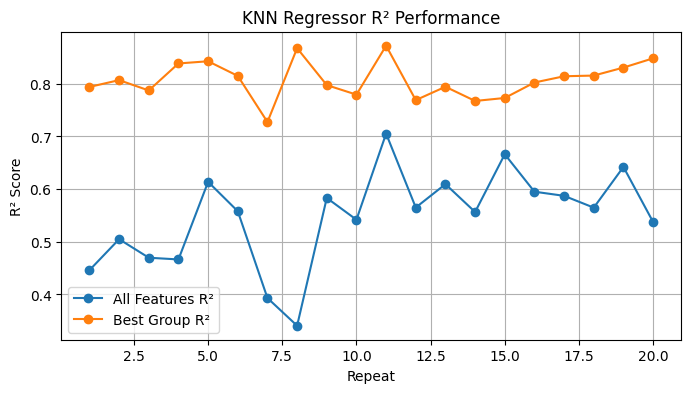

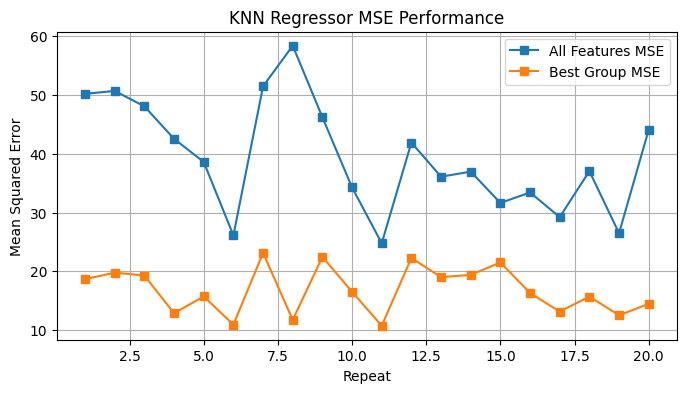


📈 میانگین نتایج پس از تکرار:
All Features → R²: 0.5473, MSE: 39.41
Best Group → R²: 0.8071, MSE: 16.81


In [3]:
# بارگذاری فایل
data = pd.read_csv('BostonHousing.csv')

print(data.columns)
# نمایش اطلاعات
print(data.head())


# جدا کردن ویژگی‌ها و برچسب‌ها
X = data.drop('medv', axis=1)
y= data['medv']

print(X.shape)


# اجرای تابع
evaluate_knn_on_dataset(X, y, test_size=0.2, n_repeats=20)


In [4]:
def knn_detailed_results_table_from_xy(X_data, y_data, test_sizes=[0.1, 0.13, 0.16, 0.19, 0.25], n_repeats=20):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score, mean_squared_error
    import pandas as pd
    import numpy as np

    feature_names = X_data.columns.tolist()

    # مرحله اول: محاسبه R² برای هر ویژگی
    scores = []
    for feature in feature_names:
        model = KNeighborsRegressor()
        model.fit(X_data[[feature]], y_data)
        y_pred = model.predict(X_data[[feature]])
        r2 = r2_score(y_data, y_pred)
        scores.append((feature, r2))

    df_scores = pd.DataFrame(scores, columns=['Feature', 'R2']).sort_values(by='R2', ascending=False).reset_index(drop=True)

    # پیدا کردن بهترین گروه
    best_r2 = -np.inf
    best_group = []
    for k in range(1, len(df_scores)+1):
        group = df_scores['Feature'][:k].tolist()
        model = KNeighborsRegressor()
        model.fit(X_data[group], y_data)
        y_pred = model.predict(X_data[group])
        r2 = r2_score(y_data, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_group = group

    # ذخیره ریز نتایج در جدول
    detailed_results = []
    for ts in test_sizes:
        for repeat in range(1, n_repeats+1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=ts)

            # مدل روی همه ویژگی‌ها
            model_all = KNeighborsRegressor()
            model_all.fit(X_train, y_train)
            y_pred_all = model_all.predict(X_test)
            r2_all = r2_score(y_test, y_pred_all)
            mse_all = mean_squared_error(y_test, y_pred_all)

            # مدل روی بهترین ویژگی‌ها
            model_modified = KNeighborsRegressor()
            model_modified .fit(X_train[best_group], y_train)
            y_pred_modified  = model_modified .predict(X_test[best_group])
            r2_modified  = r2_score(y_test, y_pred_modified )
            mse_modified  = mean_squared_error(y_test, y_pred_modified )

            detailed_results.append({
                'Test Size': ts,
                'Repeat': repeat,
                'All_R2': r2_all,
                'All_MSE': mse_all,
                'Modified _R2': r2_modified ,
                'Modified _MSE': mse_modified
            })

    return pd.DataFrame(detailed_results)


In [5]:
import pandas as pd

# بارگذاری فایل CSV
data = pd.read_csv('BostonHousing.csv')

# فرض بر این است که ستون هدف "rating" است و بقیه ویژگی‌ها
X = data.drop('medv', axis=1)
y = data['medv']

# اجرای تابع جدول
df_result = knn_detailed_results_table_from_xy(X, y)
print(df_result)


    Test Size  Repeat    All_R2    All_MSE  Modified _R2  Modified _MSE
0        0.10       1  0.528588  38.626486      0.790425      17.172125
1        0.10       2  0.522335  54.689302      0.854811      16.623114
2        0.10       3  0.641119  31.844973      0.841081      14.101522
3        0.10       4  0.463452  51.123961      0.903479       9.196816
4        0.10       5  0.129523  71.280078      0.763446      19.370478
..        ...     ...       ...        ...           ...            ...
95       0.25      16  0.504456  38.945871      0.785120      16.887855
96       0.25      17  0.544893  34.684334      0.739756      19.833518
97       0.25      18  0.544380  45.555723      0.748232      25.173310
98       0.25      19  0.526206  48.448060      0.850541      15.282976
99       0.25      20  0.613119  30.875663      0.777717      17.739644

[100 rows x 6 columns]
